#Богомолов Дмитрий ИУ5-23М
#Домашнее задание по курсу Методы машинного обучения




Домашнее задание включает выполнение следующих шагов:



1.  Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2.  Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

## Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

Импорт библиотек

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as pltl
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split

Датасет [wine quality](https://www.kaggle.com/rajyellow46/wine-quality) на сайте Kaggle



Сведения о датасете
Эти два набора данных относятся к красному и белому вариантам португальского вина "Винью Верде". Ссылка [Cortez et al., 2009]. Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, нет данных о типах винограда, марке вина, цене продажи вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, есть Мунк больше нормальных вин, чем отличных или плохих). Для обнаружения нескольких превосходных или плохих вин можно было бы использовать более сложные алгоритмы обнаружения выбросов. Кроме того, мы не уверены, что все входные переменные релевантны. Поэтому было бы интересно протестировать методы выбора функций.

Два набора данных были объединены, и несколько значений были случайным образом удалены.

атрибутивная информация:

Входные переменные (на основе физико-химических тестов):
1-тип (белое/красное)
2-фиксированная кислотность
3-Летучая кислотность
4-лимонная кислота
5-остаточный сахар
6-хлориды
7-свободный диоксид серы
8-общий диоксид серы
9-Плотность
10-рН
11-сульфаты
12-алкоголь
12-качество (оценка от 0 до 10 баллов)

In [0]:
data1 = pd.read_csv('/content/drive/My Drive/MMO_Datasets/winequalityN.csv', sep = ',')
data = pd.DataFrame(data = data1)

Выведем несколько строк

In [317]:
data.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

##Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [318]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Видим, что поле тип представляет собой текст типа object, поэтому применим Label encoder, чтобы присвоить каждому из типов вина уникальное числовое значение. Т.е. белое вино - 1, красное - 0

In [0]:
le = LabelEncoder()
for col in data.columns:
  cat_enc_le = le.fit_transform(data[col])
  data[col] = cat_enc_le
  data[col].unique()

Поиск пустых значений в колонках

In [320]:
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

type - 0
fixed acidity - 0
volatile acidity - 0
citric acid - 0
residual sugar - 0
chlorides - 0
free sulfur dioxide - 0
total sulfur dioxide - 0
density - 0
pH - 0
sulphates - 0
alcohol - 0
quality - 0


In [321]:
data.describe() #Описательные статистики

type  fixed acidity  ...      alcohol      quality
count  6497.000000    6497.000000  ...  6497.000000  6497.000000
mean      0.753886      33.276589  ...    38.793289     2.818378
std       0.430779      13.988846  ...    26.592023     0.873255
min       0.000000       0.000000  ...     0.000000     0.000000
25%       1.000000      24.000000  ...    15.000000     2.000000
50%       1.000000      31.000000  ...    33.000000     3.000000
75%       1.000000      39.000000  ...    55.000000     3.000000
max       1.000000     115.000000  ...   110.000000     6.000000

[8 rows x 13 columns]

Построим парные диаграммы для понимания структуры данных

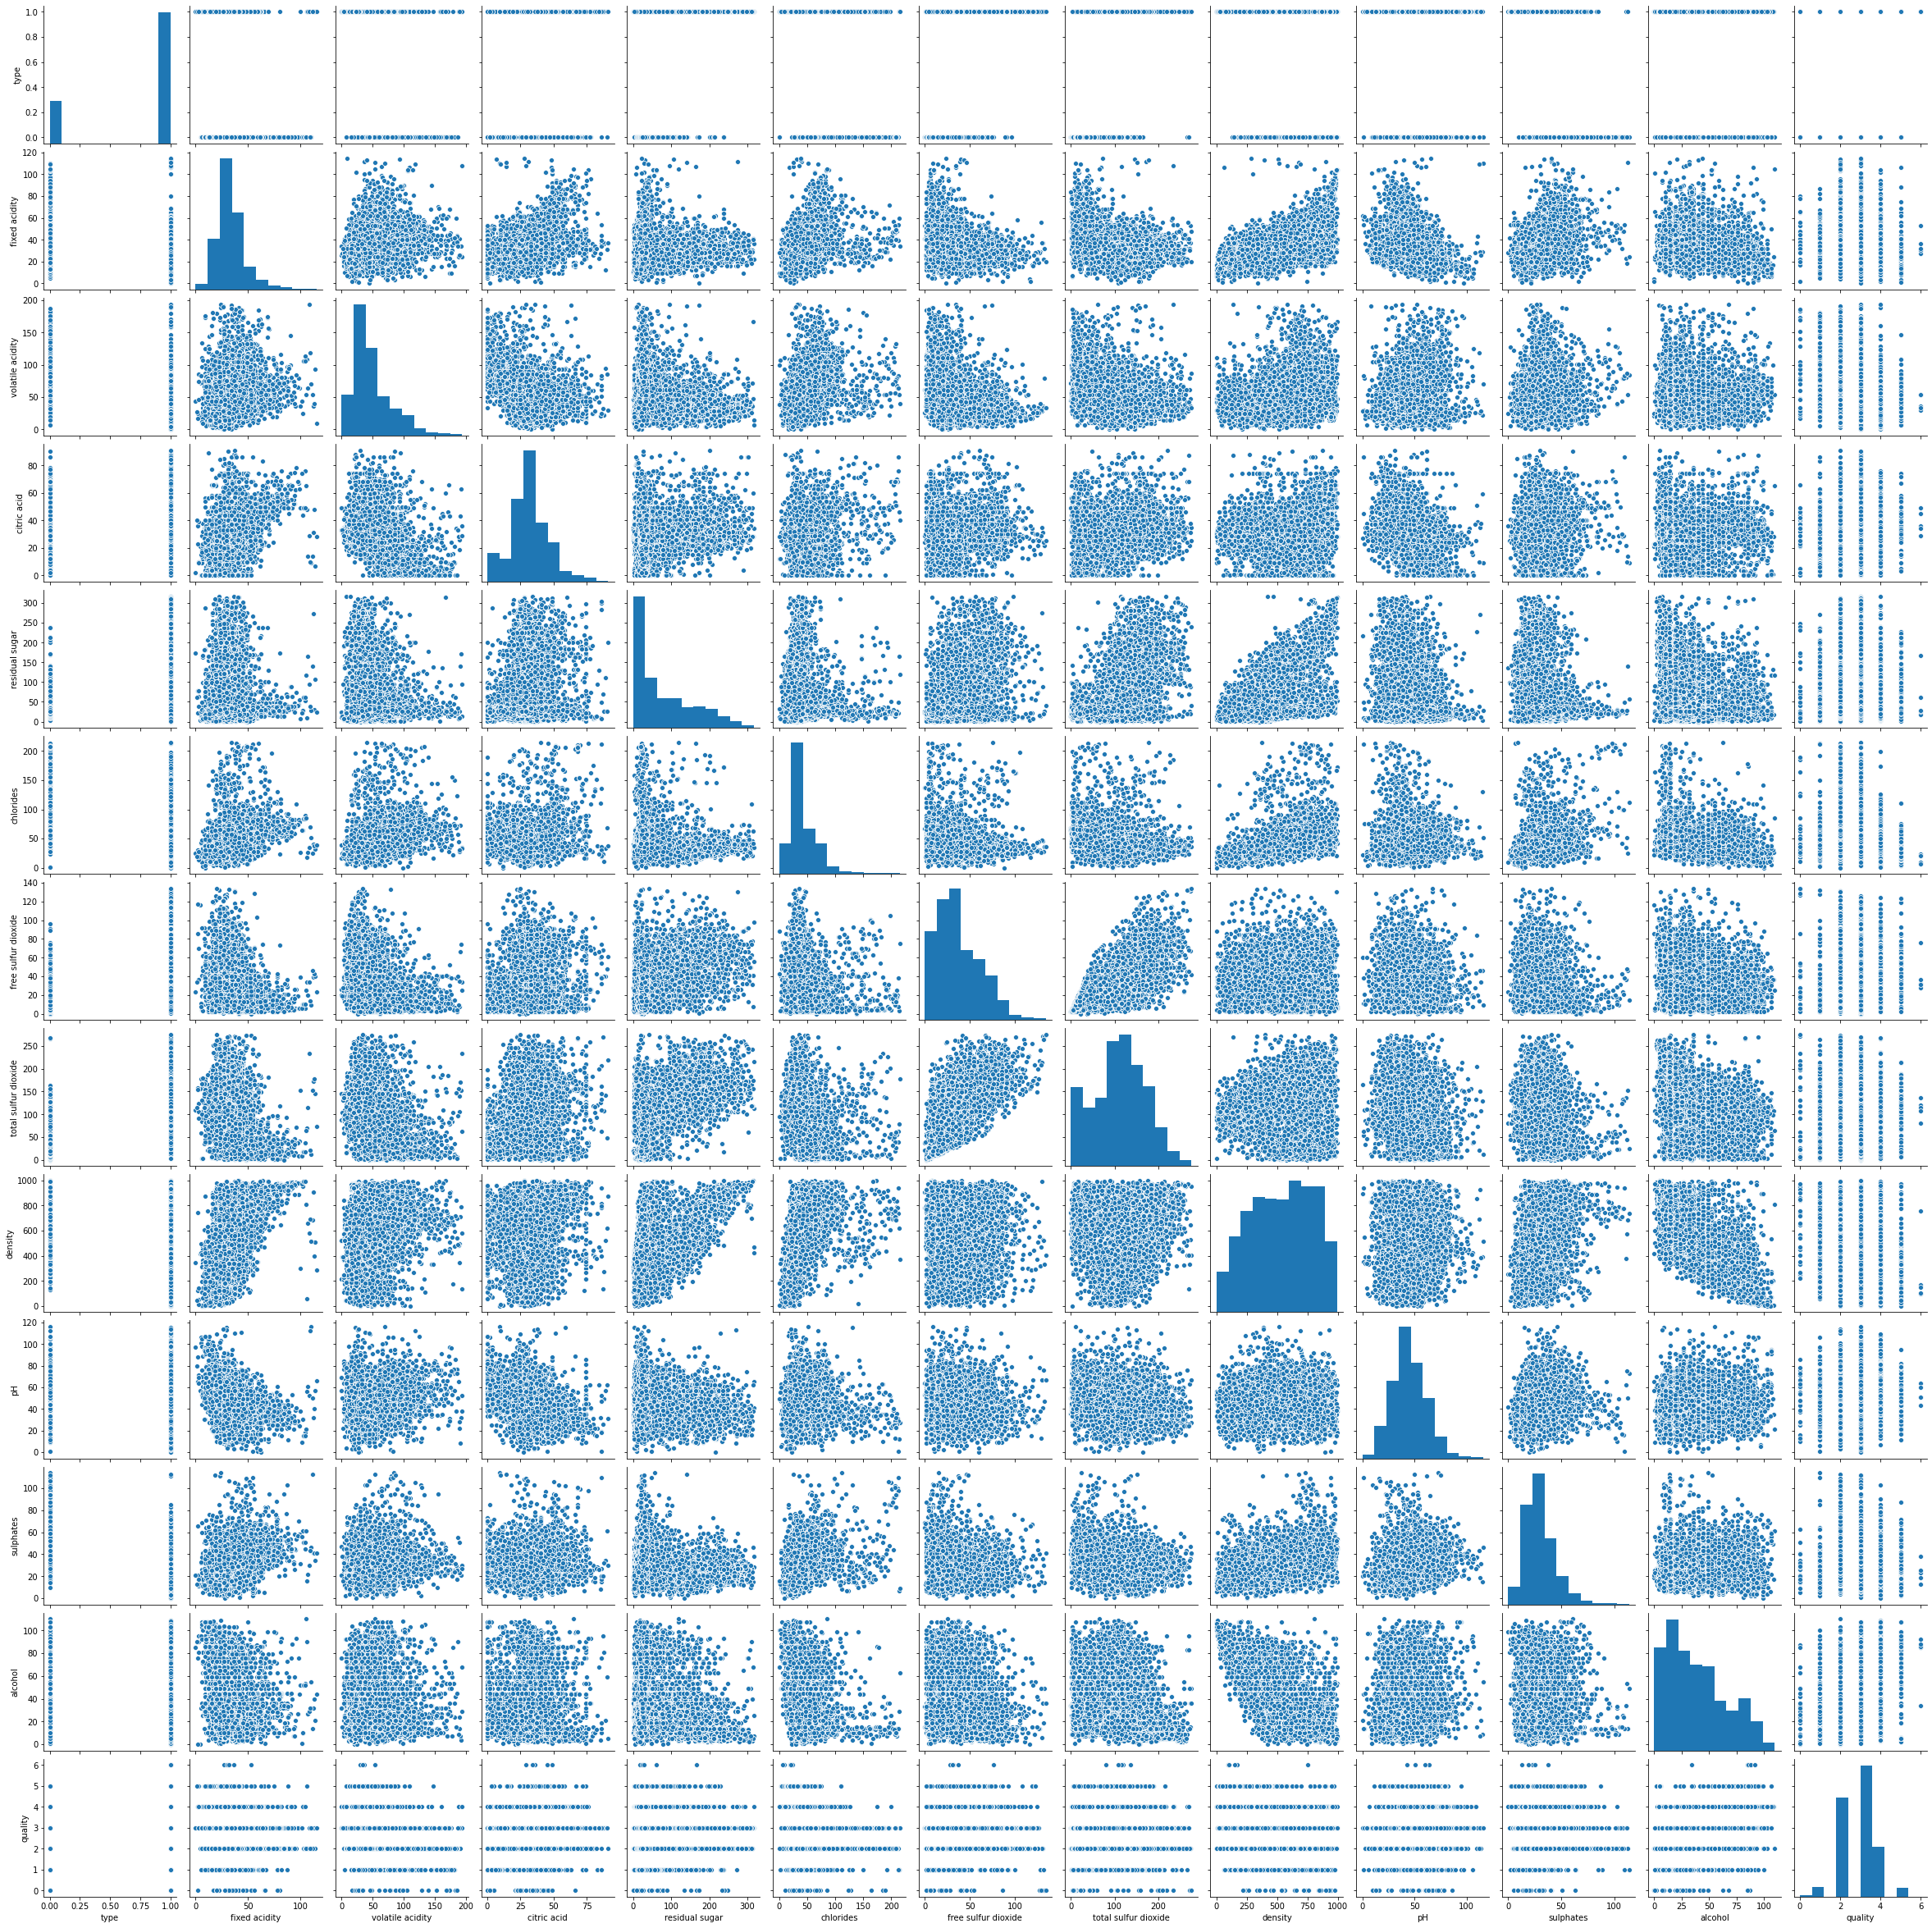

In [322]:
sns.pairplot(data)

Находим почти линейную зависимость между значениями двух колонок с содержанием "выбросов"

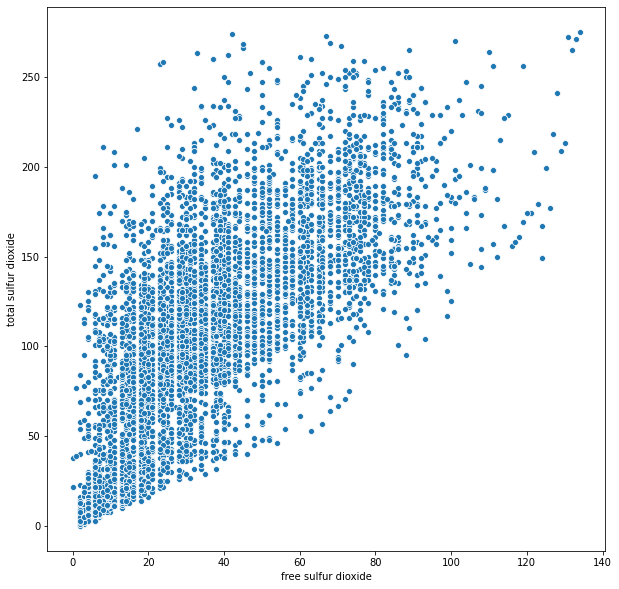

In [323]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='free sulfur dioxide', y='total sulfur dioxide', data=data)

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.



Построим корреляционную матрицу

In [324]:
data.corr()

type  fixed acidity  ...   alcohol   quality
type                  1.000000      -0.471746  ...  0.041491  0.119323
fixed acidity        -0.471746       1.000000  ... -0.104516 -0.078996
volatile acidity     -0.644529       0.221546  ... -0.042641 -0.259562
citric acid           0.187353       0.309189  ... -0.003541  0.086396
residual sugar        0.352260      -0.103445  ... -0.348267 -0.035623
chlorides            -0.601578       0.345455  ... -0.297910 -0.231030
free sulfur dioxide   0.469138      -0.270991  ... -0.185907  0.057618
total sulfur dioxide  0.696524      -0.311061  ... -0.262901 -0.041344
density              -0.406289       0.447218  ... -0.706787 -0.318416
pH                   -0.324525      -0.239439  ...  0.107531  0.019546
sulphates            -0.491583       0.295957  ... -0.009045  0.040175
alcohol               0.041491      -0.104516  ...  1.000000  0.448784
quality               0.119323      -0.078996  ...  0.448784  1.000000

[13 rows x 13 columns]

Также построим матрицу корреляций по Пирсону

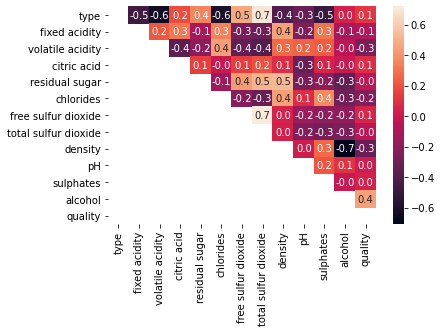

In [325]:
# Треугольный вариант матрицы Пирсона
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.1f')

По матрице видим корреляцию целевого поля type с несколькими параметрами: 
* total sulfur dioxide (0,7)
* free sulfur dioxide (0,5)
* volatile acidity (-0,6)
* chlorides(-0,6)



In [326]:
data['type'].unique()

array([1, 0])

## Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.

Модель классификации должна будет предсказать один из двух классов (белое/красное)
Для оценки качества моделей будут использованы метрики accuracy, precision и recall.

*   Accuracy — доля правильных ответов алгоритма:
*   Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными
*   Recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.



## Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.

Для решения задачи классификации были выбраны 3 модели:

1.   Логистическая регрессия
2.   SVC - Support Vector Regression
3.   Ансамблевая модель RandomForestClassifier (RFC)



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Создаём 3 модели без изменений гиперпараметров для построения базового решения

In [0]:
model1 = LogisticRegression()
model2 = SVC()
model3 = RandomForestClassifier()
result_df = pd.DataFrame()

In [0]:
from sklearn.model_selection import train_test_split

## Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data[['volatile acidity','chlorides',
                                                          'free sulfur dioxide' ]], \
                                                    data['type'], \
                                                    test_size=0.3, \
                                                    random_state=42)

In [0]:
data.dropna(inplace=True)

In [332]:
X_train.isna().sum()

volatile acidity       0
chlorides              0
free sulfur dioxide    0
dtype: int64

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [333]:
%time model1.fit(X_train,y_train)

CPU times: user 31.5 ms, sys: 18.5 ms, total: 50 ms
Wall time: 30 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [334]:
%time model2.fit(X_train,y_train)

CPU times: user 163 ms, sys: 91.9 ms, total: 255 ms
Wall time: 153 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [335]:
%time model3.fit(X_train,y_train)

CPU times: user 313 ms, sys: 1.09 ms, total: 314 ms
Wall time: 315 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [0]:
result_df.loc['LR', 'AS train'] = accuracy_score(y_train, model1.predict(X_train))
result_df.loc['LR', 'AS test'] = accuracy_score(y_test, model1.predict(X_test))
result_df.loc['LR', 'PS train'] = precision_score(y_train, model1.predict(X_train))
result_df.loc['LR', 'PS test'] = precision_score(y_test, model1.predict(X_test))
result_df.loc['LR', 'RC train'] = recall_score(y_train, model1.predict(X_train))
result_df.loc['LR', 'RC test'] = recall_score(y_test, model1.predict(X_test))
result_df.loc['LR', 'F1 train'] = f1_score(y_train, model1.predict(X_train))
result_df.loc['LR', 'F1 test'] = f1_score(y_test, model1.predict(X_test))

In [0]:
result_df.loc['SVC', 'AS train'] = accuracy_score(y_train, model2.predict(X_train))
result_df.loc['SVC', 'AS test'] = accuracy_score(y_test, model2.predict(X_test))
result_df.loc['SVC', 'PS train'] = precision_score(y_train, model2.predict(X_train))
result_df.loc['SVC', 'PS test'] = precision_score(y_test, model2.predict(X_test))
result_df.loc['SVC', 'RC train'] = recall_score(y_train, model2.predict(X_train))
result_df.loc['SVC', 'RC test'] = recall_score(y_test, model2.predict(X_test))
result_df.loc['SVC', 'F1 train'] = f1_score(y_train, model2.predict(X_train))
result_df.loc['SVC', 'F1 test'] = f1_score(y_test, model2.predict(X_test))

In [0]:
result_df.loc['RFC', 'AS train'] = accuracy_score(y_train, model3.predict(X_train))
result_df.loc['RFC', 'AS test'] = accuracy_score(y_test, model3.predict(X_test))
result_df.loc['RFC', 'PS train'] = precision_score(y_train, model3.predict(X_train))
result_df.loc['RFC', 'PS test'] = precision_score(y_test, model3.predict(X_test))
result_df.loc['RFC', 'RC train'] = recall_score(y_train, model3.predict(X_train))
result_df.loc['RFC', 'RC test'] = recall_score(y_test, model3.predict(X_test))
result_df.loc['RFC', 'F1 train'] = f1_score(y_train, model3.predict(X_train))
result_df.loc['RFC', 'F1 test'] = f1_score(y_test, model3.predict(X_test))

In [340]:
result_df

AS train   AS test  PS train  ...   RC test  F1 train   F1 test
LR   0.930724  0.925128  0.946070  ...  0.957909  0.954420  0.950809
SVC  0.963492  0.951795  0.974658  ...  0.968771  0.975795  0.968114
RFC  0.999120  0.957949  0.999125  ...  0.975560  0.999416  0.972260

[3 rows x 8 columns]

###Вывод
При сравнении трёх моделей, лучше всего с данной задачей классификации справилась ансамблевая модель Random Forest Classifier. Точность составила 95,7%